**линейный классификатор**

правило Розенблатта  

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

In [2]:
# загружаем даные
data = [
    np.loadtxt('../data/200_2b/points_1.txt'),
    np.loadtxt('../data/200_2b/points_2.txt')
]

In [3]:
# собираем вместе
X = np.vstack(data)

In [4]:
# метки классов
y = [ [i]*data[i].shape[0] for i in range(len(data)) ]
y = np.asarray(sum(y,[]))
#y = y*2-1

In [5]:
X.shape, y.shape

((200, 2), (200,))

In [6]:
%xdel data

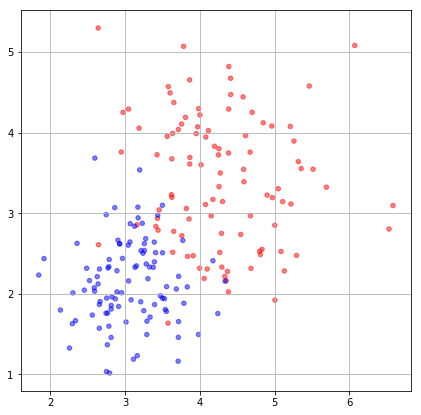

In [7]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [8]:
# биннаризация X

In [9]:
n=50
b = np.vstack([ np.linspace(X[:,j].min()-1,X[:,j].max()+1,n) for j in range(X.shape[1]) ])

In [10]:
# b

In [11]:
Xp = np.hstack([
    np.hstack([ ( (b[j,i]<X[:,j])&(X[:,j]<b[j,i+1]) ).astype(int).reshape(X.shape[0],1) 
    for i in range(b.shape[1]-1) ])
    for j in range(X.shape[1])
])

Xp.shape

(200, 98)

In [12]:
# Xp

---

In [13]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([-1.01264865e-01, -2.10627832e-02,  5.03429590e-02, -4.38621234e-02,
        4.04354837e-02, -5.88913883e-02, -7.48193349e-02, -2.41999186e-01,
        2.94156367e-04, -1.64735325e-02,  6.48221658e-02,  2.76828009e-01,
        7.65401463e-02, -1.30104766e-01, -1.03089403e-01, -4.80516698e-02,
       -8.45229852e-02, -5.01910141e-02,  4.28473799e-02,  9.52510491e-02,
        3.05437792e-01, -3.40113266e-02,  2.29959896e-02,  6.32907193e-02,
        5.09475054e-02,  5.04028340e-02, -1.77752841e-02,  1.09013860e-01,
        1.16909218e-01,  8.59505311e-02,  4.23982505e-02,  9.23258064e-02,
       -1.01974983e-01, -2.44995695e-01, -4.09229618e-02, -4.36997084e-03,
       -3.51510434e-02,  9.93211011e-02, -1.63897550e-03,  7.08867041e-02,
        2.63665801e-03,  2.35803161e-02, -3.78906185e-02, -2.30066878e-02,
       -8.23216532e-02, -5.64044711e-02,  7.55577460e-03,  1.95871231e-02,
       -8.33356737e-02, -1.21775909e-01, -1.08501095e-01,  7.03837853e-03,
       -6.31217498e-02, -

In [14]:
def loss(x,w,y): return -x.dot(w)*y    

In [15]:
MAX_ITER = 20 # максимальное число циклов обучения

# ERROR_BOUND = -Xp.shape[0]*0.99 # порог ошибки (количество ошибок)
ERROR_BOUND = -3.1

a=0.7 # скорость обучения
l = 0.5 # темп "забывания"

er_hist = [] # история ошибки

In [16]:
q = loss(Xp,W,y).sum()
er_hist.append( q )

In [17]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):
    if stop: break
    for j in np.random.permutation(Xp.shape[0]):
        
        if er_hist[-1] < ERROR_BOUND: # проверяем достижение порога
            print( 'error bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break

        xj,yj = Xp[j,:],y[j]
        
        r = (xj.dot(W)>0.5).astype(int) # выход
        W = W - a * xj.T.dot(r-y[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        er_hist.append( q )  
        

error bound on epoch 14 step 61: -3.264286


In [18]:
print(W)
print(len(er_hist),er_hist[-1],min(er_hist))

[-1.01264865e-01 -2.10627832e-02  5.03429590e-02 -4.38621234e-02
  4.04354837e-02 -5.88913883e-02 -7.48193349e-02  4.58000814e-01
  2.94156367e-04 -1.64735325e-02  7.64822166e-01  9.76828009e-01
  1.47654015e+00  5.69895234e-01  1.29691060e+00  6.51948330e-01
  1.31547701e+00  2.04980899e+00  7.42847380e-01  7.95251049e-01
  1.00543779e+00 -3.40113266e-02 -6.77004010e-01 -2.03670928e+00
  5.09475054e-02 -1.34959717e+00 -1.77752841e-02 -5.90986140e-01
 -5.83090782e-01  8.59505311e-02 -1.35760175e+00 -6.07674194e-01
 -8.01974983e-01 -2.44995695e-01 -4.09229618e-02 -4.36997084e-03
 -3.51510434e-02  9.93211011e-02 -1.63897550e-03  7.08867041e-02
  2.63665801e-03  2.35803161e-02 -3.78906185e-02 -2.30066878e-02
 -8.23216532e-02 -5.64044711e-02  7.55577460e-03  1.95871231e-02
 -8.33356737e-02 -1.21775909e-01 -1.08501095e-01  7.03837853e-03
 -6.31217498e-02 -1.77430043e-02  8.76879911e-02 -6.66450744e-02
  6.38245704e-01  1.45928147e+00  2.90773367e-02  6.43170506e-01
  2.12221282e+00  1.23579

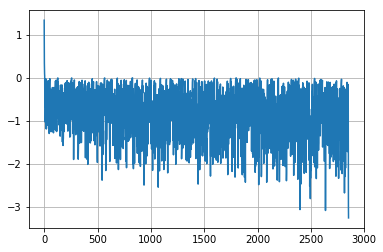

In [19]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [20]:
o = Xp.dot(W)

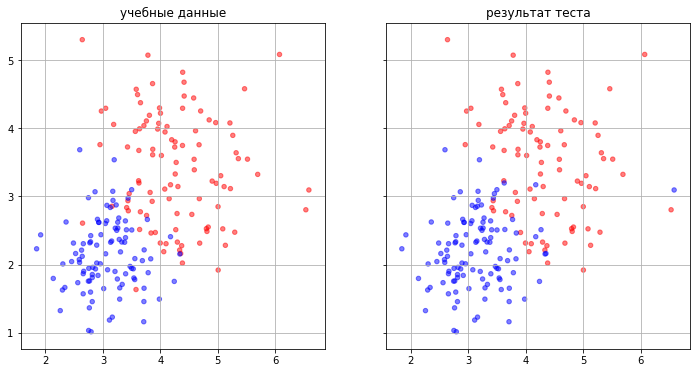

In [21]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0.5) else 'r' for j in o ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()
